
# Target 2019 Python Lesson - Part 2

---
# 1: Tuples & Dictionary

Like lists, also tuples and dictionaries allow to store multiple values, but they serve different purposes.

### 1.1: Tuples

The only major difference between a Tuple and a List is that a tuple is immutable, you **cannot** edit/remove/add values to it. Once you create a tuple, that's it. Tuples were created for speed. If you're dealing with A LOT of data or SINGLE USE data, tuples are great. They are being used in some of the projects that we'll show you. 

Defining tuples is very similar to defining a list. Use parenthesizes `()` instead of brackets `[]`. There is no difference for accessing its elements, you use brackets `[]` like for lists.

In [9]:
"""Remember that just like lists, tuples are a variable that hold
lots of other variables.
aListExample = ['do', 'you, 'remember?']

btw, this is a block comment. It's exactly like the
# comment
 but you can continue this comment on multiple lines and
end it by typing:"""

Tuple_example = ('This', 'is', 'a', 'tuple')

Tuple_example

('This', 'is', 'a', 'tuple')

In [10]:
Tuple_example[3]

'tuple'

### 1.2: Dictionary

Dictionaries are a collection of elements like lists and tuples, but they store key-value pairs. You use unique keys to set, change or access the corresponding values, one at the time. Keys can be strings, numbers, almost anything (anithing that is immutable and has a hash function). It is very quick to access/modify a single element, slower if you need to sort them or access multiple elements. Check it out below,

In [2]:
aDictionary = {'theKey': 'theValueoftheKey', 'name': 'John', 'age': 24}
# They are created with squiggly brackets {}

aDictionary['name']

'John'

In [6]:
aDictionary['age']

24

In [7]:
aDictionary['surname'] = 'Doe'  # You can add entries to a Dictionary
aDictionary['surname']

'Doe'

# 2. Modules and Packages

Remember importing the math standard library from last week? You can import all kind of modules and also define your own. Let's say that you have a very complex application written in Python. Writing all of your code in one script would not be efficient. 


In fact, say that parts of your application will use certain functions and other parts will not. To make your application more efficient, you can separate those functions in other files and then import them whenever you need them.

A collection of Python modules (e.g. the Python files in the same directory) is called package.

We're going now to create two files. One file, the module, will contain a function. The other file, the script, will import the first one and execute the function.

`def printWithBorders(text_to_print):
    numChar = len(text_to_print)
    border = numChar*'='
    print(border + '\n' + text_to_print + '\n' + border)  # remember, \n creates a newline`

First, let's create a new notebook,

![](https://i.imgur.com/VJJZB9i.png)

Then rename it to `function`,

![](https://i.imgur.com/GOmYaMq.png)

![](https://i.imgur.com/zjgq1mp.png)

![](https://i.imgur.com/sFMY402.png)

Okay, once that is done, run the command below (don't worry too much about this, again this allows us to treat Python Notebooks as actual Python scripts). Give that command a minute, once you see a number appear inside of `In []`, then you can move on.

In [8]:
!pip install importnb

     |████████████████████████████████| 61kB 4.9MB/s eta 0:00:011
You should consider upgrading via the 'pip install --upgrade pip' command.


And if you renamed the file correctly, have the correct function name, and imported that function, the below block of code should execute without any issue.

In [12]:
# Python Notebook Import
from importnb import Notebook
# Sometimes you may need: with __import__('importnb').Notebook():
with Notebook(): 
    import function

# The import is done only once (version of the Notebook the first time it was executed)
# This is to get the latest changes that you may make to the Notebook
from importlib import reload 
with Notebook():
    reload(function)

# Note: If you were using .py files, then you would just use:
# import function
# from importlib import reload
# reload(function)
        
function.printWithBorders('Hello World')

TypeError: 'slice' object is not subscriptable

So, what the Python interpreter is doing is looking in your directory where your script is and trying to find a python file called `function.py` (in this case a different extension but in practice it would be `.py`). It found it, so it executed what was within that file. Say, if it did not find it locally in the same folder as this script, it would then look where all of your standard libraries are (there is no standard library called `function`) and then error out.

# 3. File I/O

### 3.1 Opening basic files

I/O means Input/Output. So, we are going to learn how to read and write files with Python. It's important to know that when Python interacts with a file like creating, reading, or writing a file, it puts a handle on that file. Think of this like a library hold. You can place a hold on a library book. When you do this, no one else can checkout that book except you. Well, in the file system, this is the same. Python's saying, "I have a handle on this file, no one else make any changes to it or delete it". This prevents two applications for making changes at the same time to the same file or deleting it.

There are quite a few ways that Python can open a file, we'll look at a few.

| Mode* | English
| --- | :--- |
| r | Read a file, nothing else |
| r+ | Read a file, write to the **beginning** of the file|
| w | Write to a file (create or completely overwrite the file) |
| w+ | Read and Write to a file (if there's content, you can read it, and then completely overwrite it) |
| a | Append to a file (write to the bottom of a file) |
| a+ | Append & Read to a file (Read the contents, and then add more to it) |

- There are more modes, but these are all the ones you should understand for now

Here are a few examples:

- Write to a file (create one)

In [9]:
texthandle = open("MyFileName.txt", "w") # Use open (even if the file doesn't currently exist)
# We now have a handle on the file MyFileName.txt which can be found in your current directory where your script lives
# Let's write something to it
texthandle.write("This is at the top of the file\nThis is at the bottom of the file") # \n means new line
# Now, let's close the file (so we don't have a handle on it anymore)
texthandle.close()

- Now let's read a file

In [10]:
theFile = open("MyFileName.txt", 'r')
# Got it open, now print out the contents
print("The name of the file is: " + theFile.name)
print(theFile.read(5)) # Whatever is in the read parameter, that's how many bytes to read at a time
# Note: You'll see that as you repeat the above command, it will keep going from the point it left off
#       To reset this, tell Python to seek at byte 0 and then continue again
theFile.seek(0)
# Okay, reading every certain amounts of bytes can be annoying. If we know we're dealing with a SMALL text document, then we can tell Python to load the whole thing:
print(theFile.read())
theFile.close()

The name of the file is: MyFileName.txt
This 
This is at the top of the file
This is at the bottom of the file


Okay, let's remove the file without even opening it. We can't delete a file with the `open()`, but there is standard library that can. It's called `os` and this is a module that let's you manipulate the operating system. Let's rename a file and then delete one without opening it using this module.

In [8]:
import os

os.rename("MyFileName.txt", "MyNewFileName.txt") # 1st Argument, the original file name, 2nd arg, the new file name
input("do you see the change? (click enter)")
os.remove("MyNewFileName.txt") # It's gone now

do you see the change? (click enter)


The `os` module has a lot more functionality and something you use if you would like to make changes to the computer itself.

Also, just a side note, that document isn't coming back anytime soon, it doesn't go to your desktop's recycle bin.

### 3.2 Opening complex files

I'm sure you've heard of and used Microsoft Excel. While we can't open Microsoft Excel's files directly because it has special encoding, we can convert those documents into a text based files. In this file, each cell is separated by a comma and a carriage return (new line just like `\n`).

We can then use one of the standard libraries to read one of these files and it can even process the comma's and carriage returns and put it into a list for us.

To make this easier, we have provided a CSV file which is just a text file named "example.csv" with the following contents,

```
1,5
2,8
3,2
4,4
5,4
6,6
7,2
8,3
9,4
10,5
```

In [22]:
import csv

csv_file = open('example.csv', 'r') # Open the file in Python

csv_data = csv.reader(csv_file) # Read it as a csv file

csv_data_list = list(csv_data) # Turn it into a list

print('The whole thing: '+str(csv_data_list)) # With string concatenation and other variables

The whole thing: [['1', '5'], ['2', '8'], ['3', '2'], ['4', '4'], ['5', '4'], ['6', '6'], ['7', '2'], ['8', '3'], ['9', '4'], ['10', '5']]


In [11]:
print('Row 1: '+str(csv_data_list[0])) # We need to the other variables into strings

Row 1: ['1', '5']


In [12]:
print('Row 1 Column 1: '+str(csv_data_list[0][0])) # Use the str() function to do that

Row 1 Column 1: 1


# 4. Matplotlib

The last thing we're going to do today is learning how to use a library called Matplotlib. While this is not part of the standard libraries that always come with Python, we've gone ahead and installed it for you together with the Python interpreter. Matplotlib takes data and plots them. It is very easy to use but allows you to create very advanced plots.

Let's take our csv data file from above and use that to create a plot.

In [11]:
import matplotlib.pyplot as plt
import csv

csv_file = open('example.csv', 'r') # Open the file in Python

csv_data = csv.reader(csv_file) # Read it as a csv file

csv_data_list = list(csv_data) # Turn it into a list

# Go through every point in the data
for points in csv_data_list:
    plt.scatter(points[0], points[1]) # Plot the point
    
plt.show() # Now show the plot

<Figure size 640x480 with 1 Axes>

Let's say we wanted to connect those points in the scatter plot, add some other data as well, and label it,

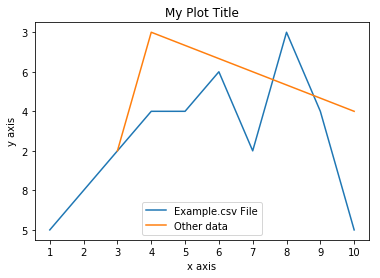

In [12]:
import matplotlib.pyplot as plt
import csv

csv_file = open('example.csv', 'r') # Open the file in Python

csv_data = csv.reader(csv_file) # Read it as a csv file

csv_data_list = list(csv_data) # Turn it into a list

# Now transpose the data
# Right now, it's [[1,1], [2,2], [3,3]]
# We need it to be [[1,2,3], [1,2,3]]
# This will do that for us
transposed_data = list(map(list, zip(*csv_data_list)))

# Ok, now split those two inner lists to x and y
x, y = transposed_data

"""Same thing as
x = transposed_data[0]
y = transposed_data[1]
"""

plt.plot(x,y, label="Example.csv File") # Create the plot from the points

plt.plot([2,3,9],[2,5,3], label="Other data") # We can have multiple data sets in one plot

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('My Plot Title')
plt.legend() # Show a legend with the labels

plt.show() # Now show the plot

Okay, for this last example, let's create a histogram. We're going to roll two dice and add their numbers. Then we're going to plot our results on a histogram. Let's roll 20,000 times.

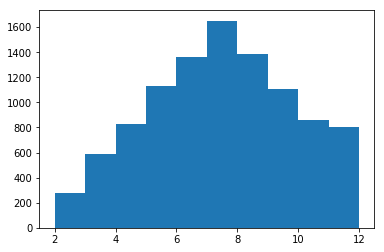

In [13]:
import matplotlib.pyplot as plt
import random

number_of_rolls = 10000

results = []
for i in range(number_of_rolls):
    # We're rolling two times and adding them together
    newValue = random.randint(1,6)+random.randint(1,6)
    # We have our two dice added together, add it to the results list
    results.append(newValue)

# First parameter is the data, second is the number of bins
plt.hist(results, 10)

# Present our plot
plt.show()

# Basic Python Completion

Okay, if you've made it this far, you actually know quite a bit of Python. If you were able to complete or understand how to complete last week's challenges and can complete this week's challenges, you are ready to start working on your project. First complete this week's challenges and then ask about the next step.